<a href="https://colab.research.google.com/github/jihyangg/project_Lovely-G.4_none/blob/main/%EA%B0%90%EA%B7%A4%EC%B0%A9%EA%B3%BC%EB%9F%89%EC%98%88%EC%B8%A1EDA_%ED%91%9C%EC%A7%80%ED%96%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install flaml
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/sample_submission.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [ ]:
df_test.head()

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,72.091497,71.906176,71.886799,71.858720,71.725540,71.531618,71.476935,71.321237,71.184295,71.000223
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,68.423776,68.353200,68.346777,68.188159,67.995233,67.879958,67.744820,67.673522,67.539973,67.447849
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,74.435783,74.247468,74.142664,74.070401,73.892408,73.796143,73.615838,73.440136,73.387051,73.228319
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,73.570735,73.420243,73.313538,73.149298,73.109599,72.924511,72.847411,72.838263,72.672156,72.538171
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,72.216758,72.163153,72.052952,71.905982,71.766141,71.746813,71.668847,71.501043,71.419715,71.328224


In [ ]:
df_test.shape

(2208, 183)

In [ ]:
df_train.shape

(2207, 184)

In [ ]:
df_test.columns

Index(['ID', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순',
       '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=183)

In [ ]:
df_train.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

In [ ]:
df_train.isna().sum()

ID                0
착과량(int)          0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 184, dtype: int64

In [ ]:
df_test.isna().sum()

ID                0
수고(m)             0
수관폭1(min)         0
수관폭2(max)         0
수관폭평균             0
                 ..
2022-11-24 엽록소    0
2022-11-25 엽록소    0
2022-11-26 엽록소    0
2022-11-27 엽록소    0
2022-11-28 엽록소    0
Length: 183, dtype: int64

<Axes: ylabel='Frequency'>

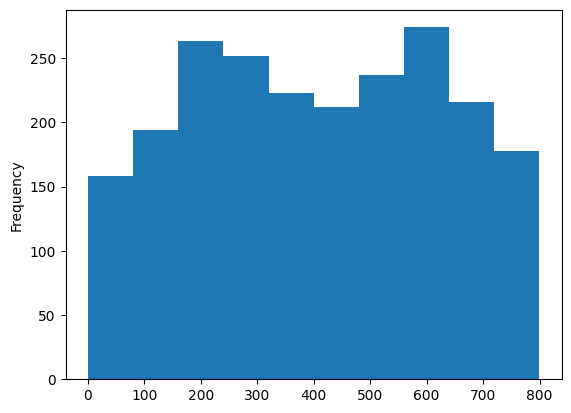

In [ ]:
df_train['착과량(int)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

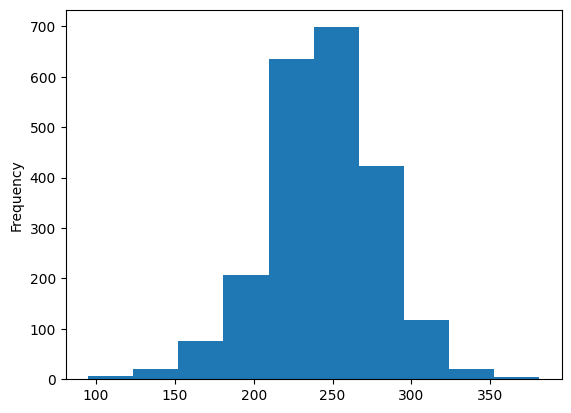

In [ ]:
df_train['수고(m)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

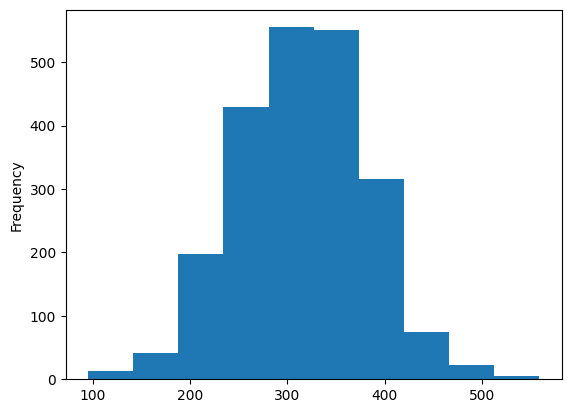

In [ ]:
df_train['수관폭1(min)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

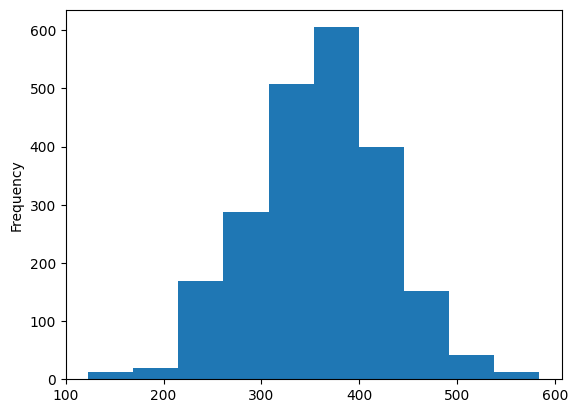

In [ ]:
df_train['수관폭2(max)'].plot(kind='hist')

<Axes: ylabel='Frequency'>

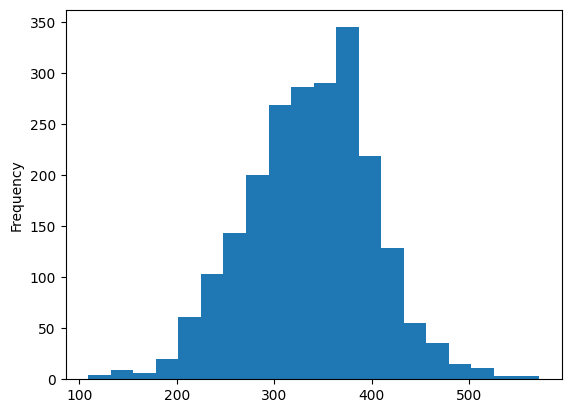

In [ ]:
df_train['수관폭평균'].plot(kind='hist',bins=20)

<ipython-input-19-072cb031feab>:3: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  plt.tight_layout()
<ipython-input-19-072cb031feab>:3: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


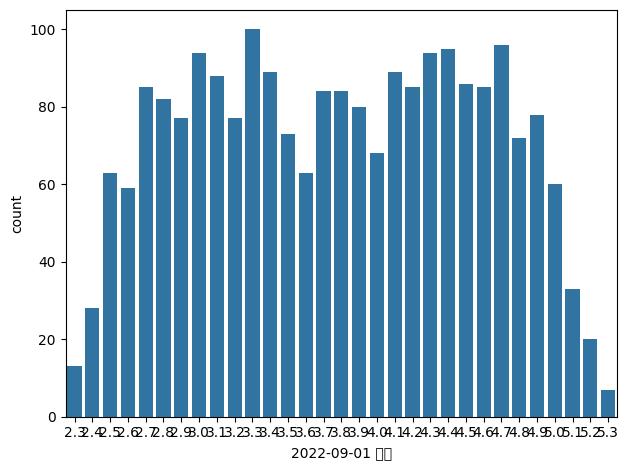

In [ ]:
sns.countplot(data = df_train, x = '2022-09-01 새순')
plt.subplots_adjust(wspace = 2)
plt.tight_layout()
plt.show()


```

2022-09-01 새순 분포

<Axes: xlabel='2022-09-01 새순', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  f

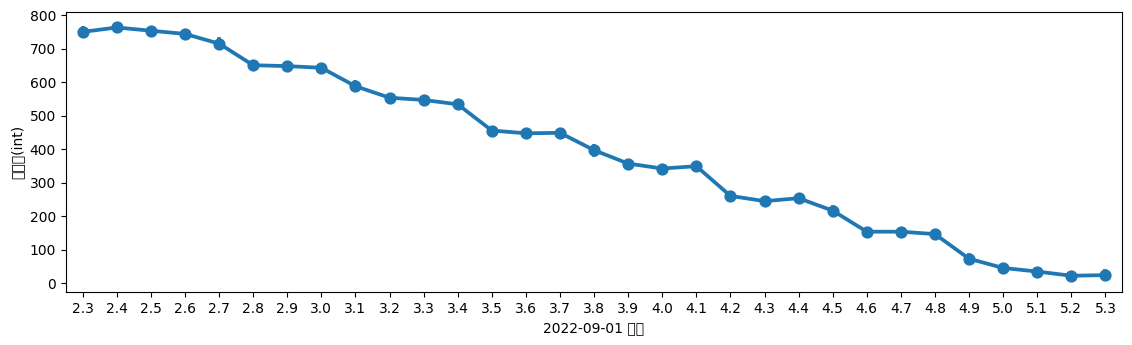

In [ ]:
fig = plt.figure(figsize=(30, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '2022-09-01 새순', y = '착과량(int)')

새순과 착과량 상관관계

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.

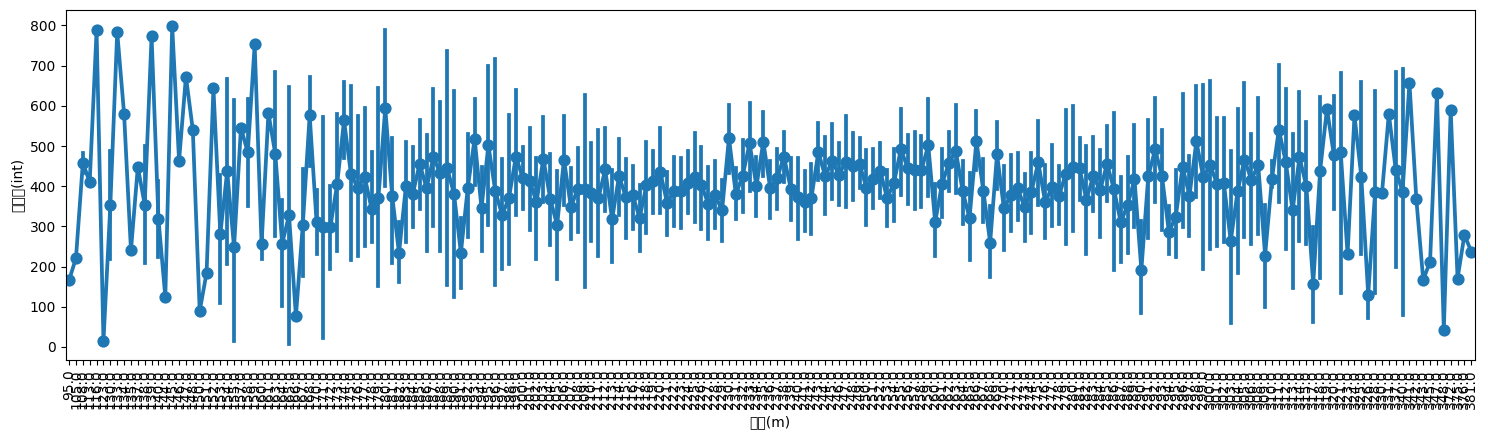

In [ ]:
fig = plt.figure(figsize=(40, 10))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수고(m)', y = '착과량(int)')
plt.xticks(rotation= 'vertical')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

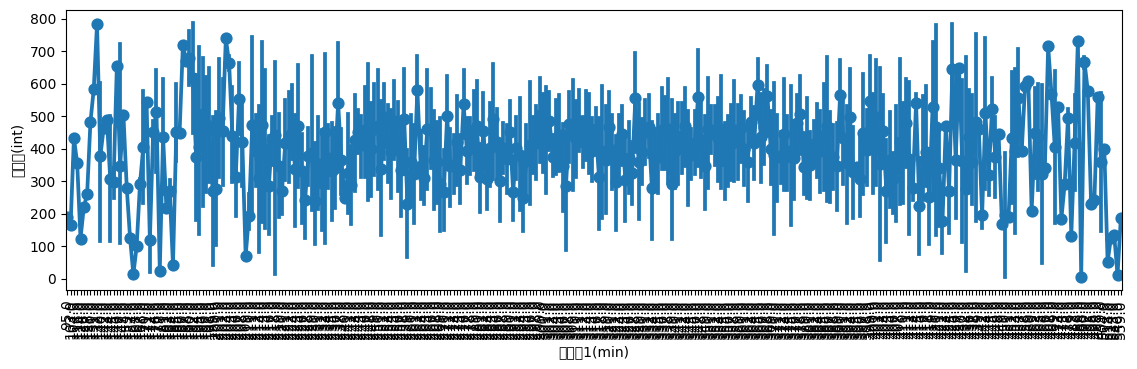

In [ ]:
ig = plt.figure(figsize=(30, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭1(min)', y = '착과량(int)')
plt.xticks(rotation= 'vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

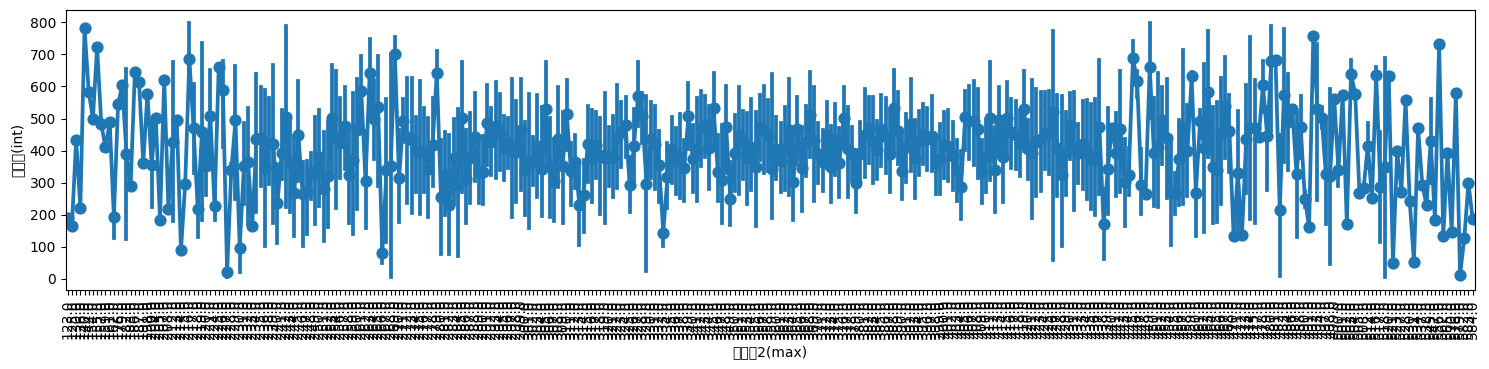

In [ ]:
fig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭2(max)', y = '착과량(int)')
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func

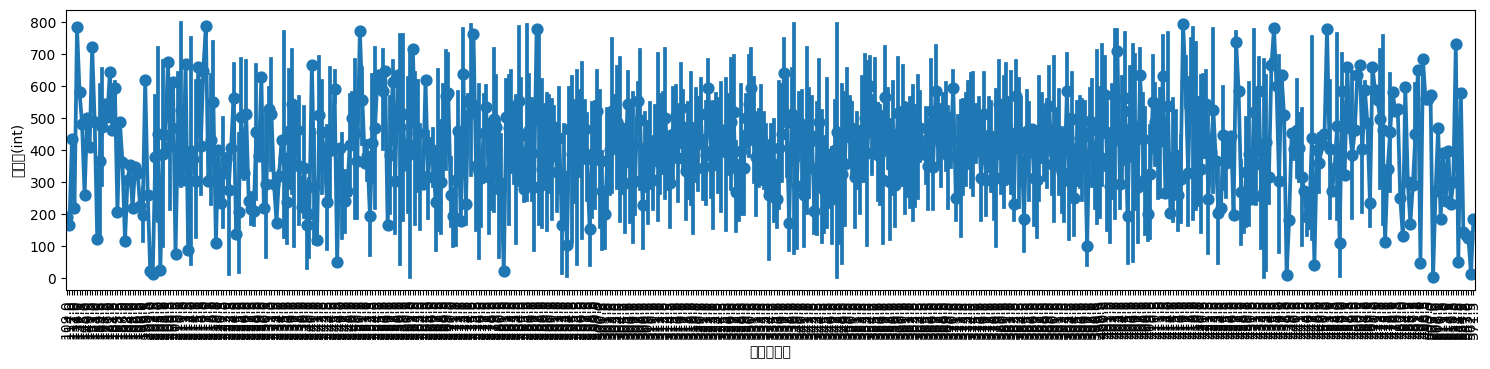

In [ ]:
fig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭평균', y = '착과량(int)')
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

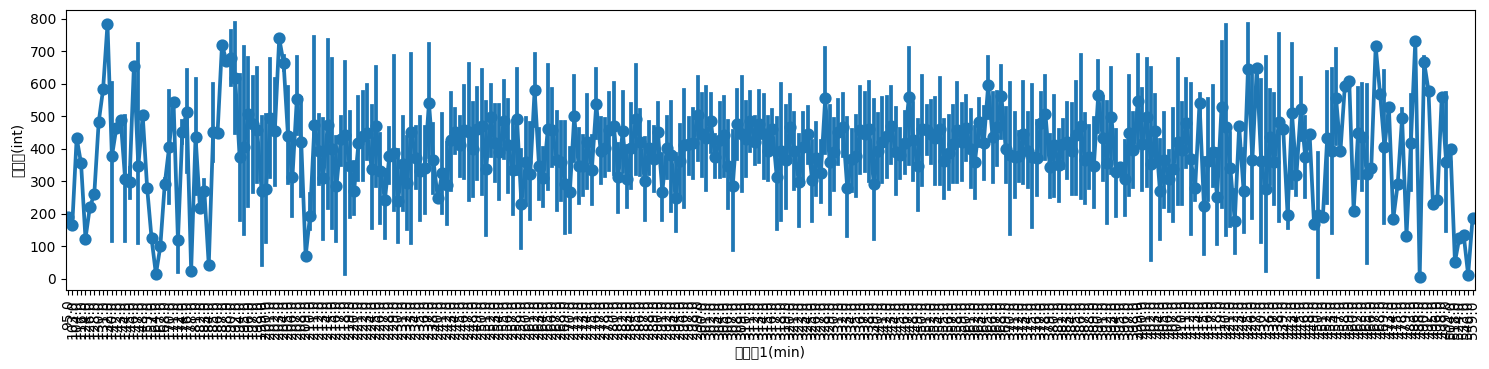

In [ ]:
fig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭1(min)', y = '착과량(int)')
plt.xticks(rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

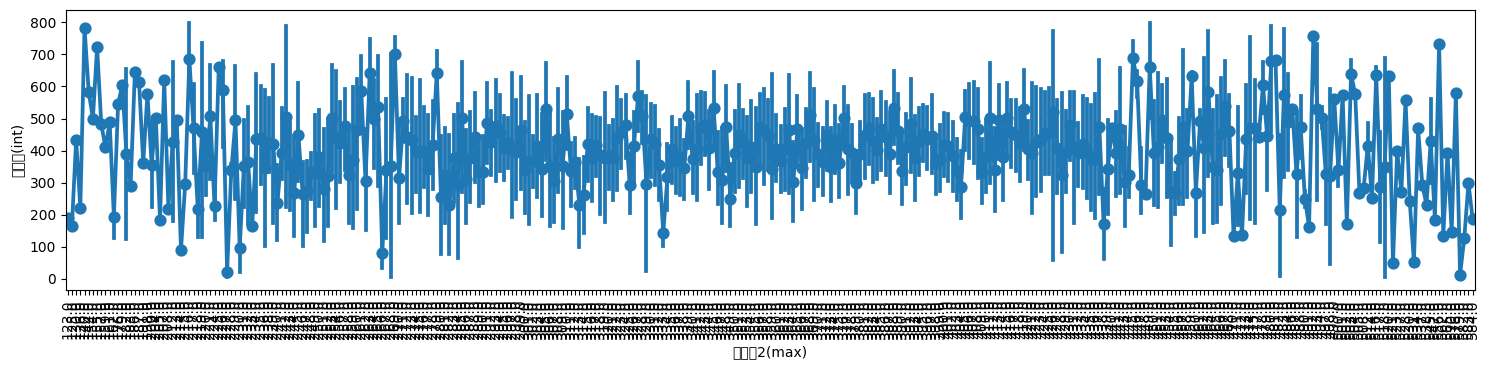

In [ ]:
fig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭2(max)', y = '착과량(int)')
plt.xticks(rotation='vertical')

<Axes: xlabel='수관폭2(max)', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

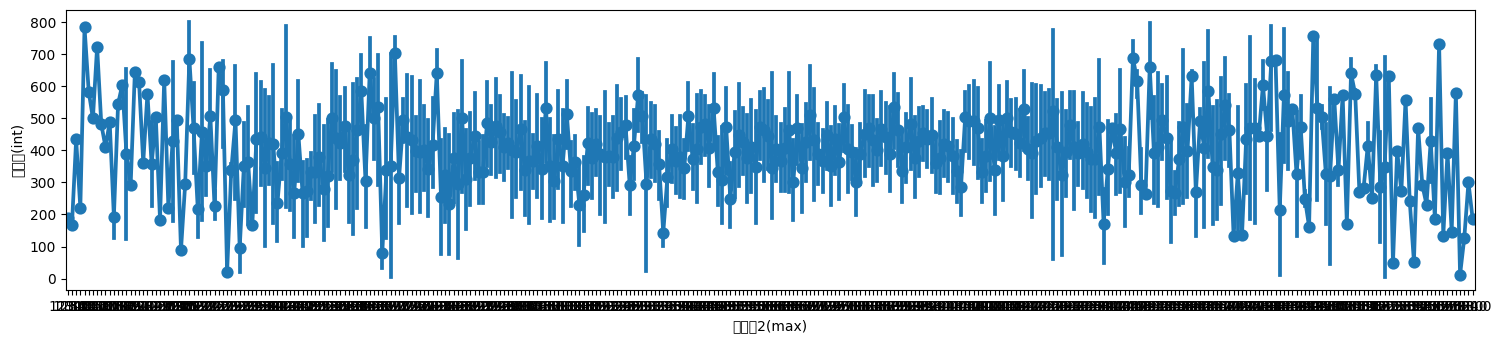

In [ ]:
fig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '수관폭2(max)', y = '착과량(int)')


<ipython-input-28-98cb1bb589d8>:4: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  plt.tight_layout()
<ipython-input-28-98cb1bb589d8>:4: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


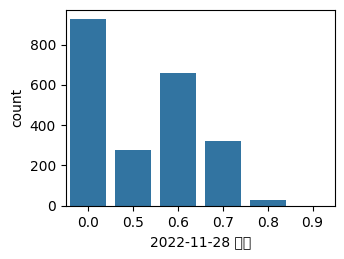

In [ ]:
plt.subplot(222)
sns.countplot(data = df_train, x = '2022-11-28 새순')
plt.subplots_adjust(wspace = 2)
plt.tight_layout()
plt.show()

<Axes: xlabel='2022-11-28 새순', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from current font.
  f

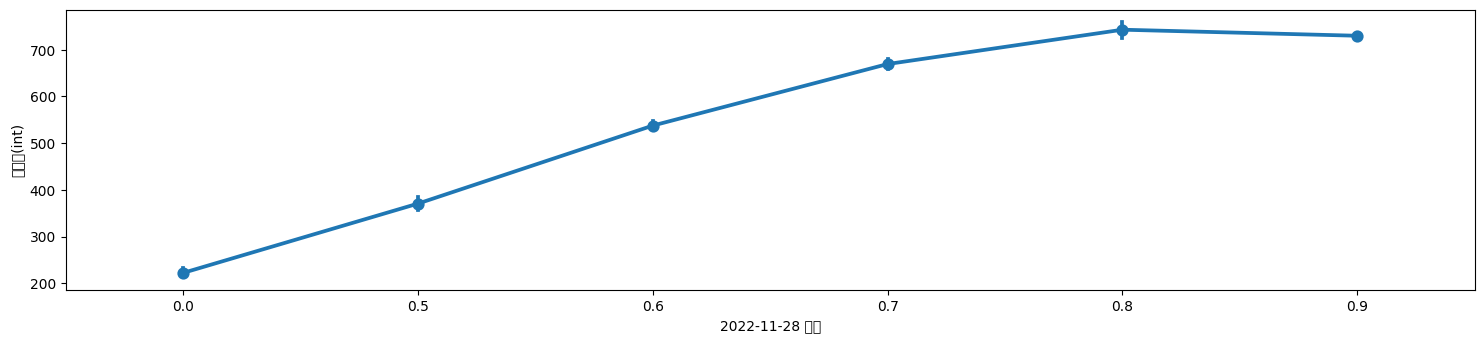

In [ ]:
ig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '2022-11-28 새순', y = '착과량(int)')


In [ ]:
print('새순 0901 : %lf, 새순1128 : %lf '%(df_train['2022-09-01 새순'].mean(),df_train['2022-11-28 새순'].mean()))

새순 0901 : 3.774807, 새순1128 : 0.352832 


<Axes: xlabel='2022-09-01 엽록소', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50685 (\N{HANGUL SYLLABLE YEOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

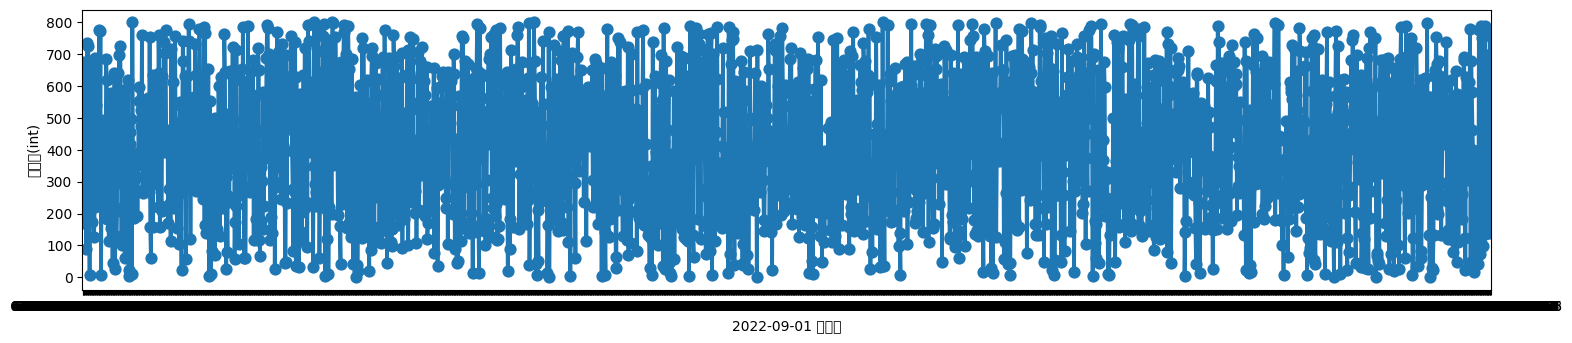

In [ ]:
ig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '2022-09-01 엽록소', y = '착과량(int)')

<Axes: xlabel='2022-11-28 엽록소', ylabel='착과량(int)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50685 (\N{HANGUL SYLLABLE YEOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*

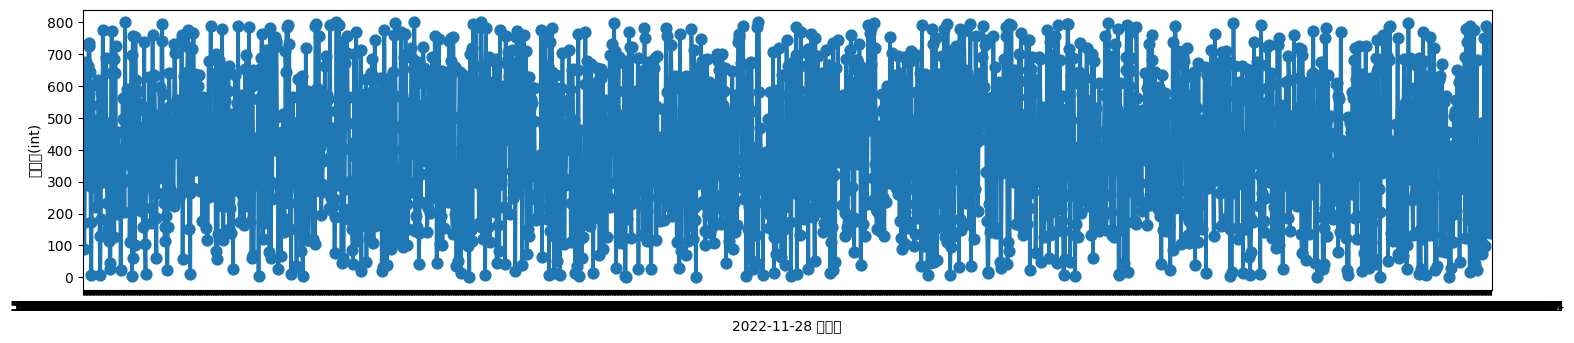

In [ ]:
ig = plt.figure(figsize=(40, 8))
plt.subplot(221)
sns.pointplot(data = df_train, x = '2022-11-28 엽록소', y = '착과량(int)')

In [ ]:
print('엽록소 0901 : %lf, 엽록소1128 : %lf '%(df_train['2022-09-01 엽록소'].mean(),df_train['2022-11-28 엽록소'].mean()))

엽록소 0901 : 76.899788, 엽록소1128 : 68.093096 


In [ ]:
# find the columns that header contain '새순'
new_columns = []
for col in df_train.columns:
    if '새순' in col:
        new_columns.append(col)

# find the columns that header contain '엽록소'
new_columns_2 = []
for col in df_train.columns:
    if '엽록소' in col:
        new_columns_2.append(col)

# mean value of columns that header contain '새순'
new_columns_mean = df_train[new_columns].mean(axis=1)
new_columns_mean_2 = df_test[new_columns].mean(axis=1)

# mean value of columns that header contain '엽록소'
new_columns_mean_3 = df_train[new_columns_2].mean(axis=1)
new_columns_mean_4 = df_test[new_columns_2].mean(axis=1)

# add new columns
df_train['새순_mean'] = new_columns_mean
df_test['새순_mean'] = new_columns_mean_2

df_train['엽록소_mean'] = new_columns_mean_3
df_test['엽록소_mean'] = new_columns_mean_4

# std value of columns that header contain '새순'
new_columns_std = df_train[new_columns].std(axis=1)
new_columns_std_2 = df_test[new_columns].std(axis=1)

# std value of columns that header contain '엽록소'
new_columns_std_3 = df_train[new_columns_2].std(axis=1)
new_columns_std_4 = df_test[new_columns_2].std(axis=1)

# add new columns
df_train['새순_std'] = new_columns_std
df_test['새순_std'] = new_columns_std_2

df_train['엽록소_std'] = new_columns_std_3
df_test['엽록소_std'] = new_columns_std_4

# min - max value of columns that header contain '새순'
new_columns_min_max = df_train[new_columns].max(axis=1) - df_train[new_columns].min(axis=1)
new_columns_min_max_2 = df_test[new_columns].max(axis=1) - df_test[new_columns].min(axis=1)

# min - max value of columns that header contain '엽록소'
new_columns_min_max_3 = df_train[new_columns_2].max(axis=1) - df_train[new_columns_2].min(axis=1)
new_columns_min_max_4 = df_test[new_columns_2].max(axis=1) - df_test[new_columns_2].min(axis=1)

# add new columns
df_train['새순_min_max'] = new_columns_min_max
df_test['새순_min_max'] = new_columns_min_max_2

df_train['엽록소_min_max'] = new_columns_min_max_3
df_test['엽록소_min_max'] = new_columns_min_max_4

# sum value of columns that header contain '새순'
new_columns_sum = df_train[new_columns].sum(axis=1)
new_columns_sum_2 = df_test[new_columns].sum(axis=1)

# sum value of columns that header contain '엽록소'
new_columns_sum_3 = df_train[new_columns_2].sum(axis=1)
new_columns_sum_4 = df_test[new_columns_2].sum(axis=1)

# add new columns
df_train['새순_sum'] = new_columns_sum
df_test['새순_sum'] = new_columns_sum_2

df_train['엽록소_sum'] = new_columns_sum_3
df_test['엽록소_sum'] = new_columns_sum_4

# max value of columns that header contain '새순'
new_columns_max = df_train[new_columns].max(axis=1)
new_columns_max_2 = df_test[new_columns].max(axis=1)

# max value of columns that header contain '엽록소'
new_columns_max_3 = df_train[new_columns_2].max(axis=1)
new_columns_max_4 = df_test[new_columns_2].max(axis=1)

# add new columns
df_train['새순_max'] = new_columns_max
df_test['새순_max'] = new_columns_max_2

df_train['엽록소_max'] = new_columns_max_3
df_test['엽록소_max'] = new_columns_max_4

# min value of columns that header contain '새순'
new_columns_min = df_train[new_columns].min(axis=1)
new_columns_min_2 = df_test[new_columns].min(axis=1)

# min value of columns that header contain '엽록소'
new_columns_min_3 = df_train[new_columns_2].min(axis=1)
new_columns_min_4 = df_test[new_columns_2].min(axis=1)

# add new columns
df_train['새순_min'] = new_columns_min
df_test['새순_min'] = new_columns_min_2

df_train['엽록소_min'] = new_columns_min_3
df_test['엽록소_min'] = new_columns_min_4

# 새순, 엽록소 차이
df_train["새순diff"] = df_train["2022-11-28 새순"] - df_train["2022-09-01 새순"]
df_test["새순diff"] = df_test["2022-11-28 새순"] - df_test["2022-09-01 새순"]
df_train["엽록소diff"] = df_train["2022-11-28 엽록소"] - df_train["2022-09-01 엽록소"]
df_test["엽록소diff"] = df_test["2022-11-28 엽록소"] - df_test["2022-09-01 엽록소"]

# '수관폭차이' 컬럼
df_train['수관폭차이'] = df_train['수관폭2(max)']-df_train['수관폭1(min)']
df_test['수관폭차이'] = df_test['수관폭2(max)']-df_test['수관폭1(min)']

# 기간 별로 나눈 컬럼
df_train['새순1'] = df_train.iloc[:, 6:13].mean(axis=1)
df_train['새순2'] = df_train.iloc[:, 13:20].mean(axis=1)
df_train['새순3'] = df_train.iloc[:, 20:27].mean(axis=1)
df_train['새순4'] = df_train.iloc[:, 27:34].mean(axis=1)
df_train['새순5'] = df_train.iloc[:, 34:41].mean(axis=1)
df_train['새순6'] = df_train.iloc[:, 41:48].mean(axis=1)
df_train['새순7'] = df_train.iloc[:, 48:55].mean(axis=1)
df_train['새순8'] = df_train.iloc[:, 55:62].mean(axis=1)
df_train['새순9'] = df_train.iloc[:, 62:69].mean(axis=1)
df_train['새순10'] = df_train.iloc[:, 69:76].mean(axis=1)
df_train['새순11'] = df_train.iloc[:, 76:83].mean(axis=1)
df_train['새순12'] = df_train.iloc[:, 83:90].mean(axis=1)
df_train['새순13'] = df_train.iloc[:, 90:96].mean(axis=1)


df_test['새순1'] = df_test.iloc[:, 5:12].mean(axis=1)
df_test['새순2'] = df_test.iloc[:, 12:19].mean(axis=1)
df_test['새순3'] = df_test.iloc[:, 19:26].mean(axis=1)
df_test['새순4'] = df_test.iloc[:, 26:33].mean(axis=1)
df_test['새순5'] = df_test.iloc[:, 33:40].mean(axis=1)
df_test['새순6'] = df_test.iloc[:, 40:47].mean(axis=1)
df_test['새순7'] = df_test.iloc[:, 47:54].mean(axis=1)
df_test['새순8'] = df_test.iloc[:, 54:61].mean(axis=1)
df_test['새순9'] = df_test.iloc[:, 61:68].mean(axis=1)
df_test['새순10'] = df_test.iloc[:, 68:75].mean(axis=1)
df_test['새순11'] = df_test.iloc[:, 75:82].mean(axis=1)
df_test['새순12'] = df_test.iloc[:, 82:89].mean(axis=1)
df_test['새순13'] = df_test.iloc[:, 89:95].mean(axis=1)


# 시계열데이터 드롭
# drop columns that header contain '새순'
df_train = df_train.drop(new_columns, axis=1)
df_test = df_test.drop(new_columns, axis=1)

# drop columns that header contain '엽록소'
df_train = df_train.drop(new_columns_2, axis=1)
df_test = df_test.drop(new_columns_2, axis=1)

In [ ]:
df_train['새순1'] = df_train.iloc[:, 6:11].mean(axis=1)
df_train['새순2'] = df_train.iloc[:, 11:16].mean(axis=1)
df_train['새순3'] = df_train.iloc[:, 16:21].mean(axis=1)
df_train['새순4'] = df_train.iloc[:, 21:26].mean(axis=1)
df_train['새순5'] = df_train.iloc[:, 26:31].mean(axis=1)
df_train['새순6'] = df_train.iloc[:, 31:36].mean(axis=1)
df_train['새순7'] = df_train.iloc[:, 36:41].mean(axis=1)
df_train['새순8'] = df_train.iloc[:, 41:46].mean(axis=1)
df_train['새순9'] = df_train.iloc[:, 46:51].mean(axis=1)
df_train['새순10'] = df_train.iloc[:, 51:56].mean(axis=1)
df_train['새순11'] = df_train.iloc[:, 56:61].mean(axis=1)
df_train['새순12'] = df_train.iloc[:, 61:66].mean(axis=1)
df_train['새순13'] = df_train.iloc[:, 66:71].mean(axis=1)
df_train['새순14'] = df_train.iloc[:, 71:76].mean(axis=1)
df_train['새순15'] = df_train.iloc[:, 76:81].mean(axis=1)
df_train['새순16'] = df_train.iloc[:, 81:86].mean(axis=1)
df_train['새순17'] = df_train.iloc[:, 86:91].mean(axis=1)
df_train['새순18'] = df_train.iloc[:, 91:96].mean(axis=1)

df_test['새순1'] = df_test.iloc[:, 5:10].mean(axis=1)
df_test['새순2'] = df_test.iloc[:, 10:15].mean(axis=1)
df_test['새순3'] = df_test.iloc[:, 15:20].mean(axis=1)
df_test['새순4'] = df_test.iloc[:, 20:25].mean(axis=1)
df_test['새순5'] = df_test.iloc[:, 25:30].mean(axis=1)
df_test['새순6'] =df_test.iloc[:, 30:35].mean(axis=1)
df_test['새순7'] = df_test.iloc[:, 35:40].mean(axis=1)
df_test['새순8'] = df_test.iloc[:, 40:45].mean(axis=1)
df_test['새순9'] = df_test.iloc[:, 45:50].mean(axis=1)
df_test['새순10'] = df_test.iloc[:, 50:55].mean(axis=1)
df_test['새순11'] = df_test.iloc[:, 55:60].mean(axis=1)
df_test['새순12'] = df_test.iloc[:, 60:65].mean(axis=1)
df_test['새순13'] = df_test.iloc[:, 65:70].mean(axis=1)
df_test['새순14'] = df_test.iloc[:, 70:75].mean(axis=1)
df_test['새순15'] =df_test.iloc[:, 75:80].mean(axis=1)
df_test['새순16'] = df_test.iloc[:, 80:85].mean(axis=1)
df_test['새순17'] = df_test.iloc[:, 85:90].mean(axis=1)
df_test['새순18'] = df_test.iloc[:, 90:95].mean(axis=1)

In [ ]:
df_train['엽록소1'] = df_train.iloc[:, 96:101].mean(axis=1)
df_train['엽록소2'] = df_train.iloc[:, 101:106].mean(axis=1)
df_train['엽록소3'] = df_train.iloc[:, 106:111].mean(axis=1)
df_train['엽록소4'] = df_train.iloc[:, 111:116].mean(axis=1)
df_train['엽록소5'] = df_train.iloc[:, 116:121].mean(axis=1)
df_train['엽록소6'] = df_train.iloc[:, 121:126].mean(axis=1)
df_train['엽록소7'] = df_train.iloc[:, 126:131].mean(axis=1)
df_train['엽록소8'] = df_train.iloc[:, 131:136].mean(axis=1)
df_train['엽록소9'] = df_train.iloc[:, 136:141].mean(axis=1)
df_train['엽록소10'] = df_train.iloc[:, 141:146].mean(axis=1)
df_train['엽록소11'] = df_train.iloc[:, 146:151].mean(axis=1)
df_train['엽록소12'] = df_train.iloc[:, 151:156].mean(axis=1)
df_train['엽록소13'] = df_train.iloc[:, 156:161].mean(axis=1)
df_train['엽록소14'] = df_train.iloc[:, 161:166].mean(axis=1)
df_train['엽록소15'] = df_train.iloc[:, 166:171].mean(axis=1)
df_train['엽록소16'] = df_train.iloc[:, 171:176].mean(axis=1)
df_train['엽록소17'] = df_train.iloc[:, 176:181].mean(axis=1)
df_train['엽록소18'] = df_train.iloc[:, 181:185].mean(axis=1)

df_test['엽록소1'] = df_test.iloc[:, 95:100].mean(axis=1)
df_test['엽록소2'] = df_test.iloc[:, 100:105].mean(axis=1)
df_test['엽록소3'] = df_test.iloc[:, 105:110].mean(axis=1)
df_test['엽록소4'] = df_test.iloc[:, 110:115].mean(axis=1)
df_test['엽록소5'] = df_test.iloc[:, 115:120].mean(axis=1)
df_test['엽록소6'] = df_test.iloc[:, 120:125].mean(axis=1)
df_test['엽록소7'] = df_test.iloc[:, 125:130].mean(axis=1)
df_test['엽록소8'] = df_test.iloc[:, 130:135].mean(axis=1)
df_test['엽록소9'] = df_test.iloc[:, 135:140].mean(axis=1)
df_test['엽록소10'] = df_test.iloc[:, 140:145].mean(axis=1)
df_test['엽록소11'] = df_test.iloc[:, 145:150].mean(axis=1)
df_test['엽록소12'] = df_test.iloc[:, 150:155].mean(axis=1)
df_test['엽록소13'] = df_test.iloc[:, 155:160].mean(axis=1)
df_test['엽록소14'] = df_test.iloc[:, 160:165].mean(axis=1)
df_test['엽록소15'] = df_test.iloc[:, 165:170].mean(axis=1)
df_test['엽록소16'] = df_test.iloc[:, 170:175].mean(axis=1)
df_test['엽록소17'] = df_test.iloc[:, 175:180].mean(axis=1)
df_test['엽록소18'] = df_test.iloc[:, 180:184].mean(axis=1)

In [ ]:
y_train = df_train['착과량(int)']
x_train = df_train.drop(['ID', '착과량(int)'],axis=1)

X_test = df_test.drop('ID', axis = 1)

모델링

AutoML(flaml)을 활용한 Model Selection

In [ ]:
from flaml import AutoML

MODEL_TIME_BUDGET = 60*5
MODEL_METRIC = 'mae'
MODEL_TASK = "regression"

auto_model = AutoML()
params = {
    "time_budget": MODEL_TIME_BUDGET,
    "metric": MODEL_METRIC,
    "task": MODEL_TASK,
    "seed": 42
}
auto_model.fit(X_train, y_train, **params)

print('Best hyperparmeter:', auto_model.model.estimator)
print('Best hyperparmeter config:', auto_model.best_config)

[flaml.automl.logger: 03-25 09:43:45] {1680} INFO - task = regression
[flaml.automl.logger: 03-25 09:43:45] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 03-25 09:43:45] {1789} INFO - Minimizing error metric: mae
[flaml.automl.logger: 03-25 09:43:45] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 03-25 09:43:45] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-25 09:43:45] {2345} INFO - Estimated sufficient time budget=1675s. Estimated necessary time budget=12s.
[flaml.automl.logger: 03-25 09:43:45] {2392} INFO -  at 0.2s,	estimator lgbm's best error=128.9090,	best estimator lgbm's best error=128.9090
[flaml.automl.logger: 03-25 09:43:45] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-25 09:43:45] {2392} INFO -  at 0.4s,	estimator lgbm's best error=128.9090,	best estimator lgbm's best error=128.9090
[flaml.automl.logger: 03-25 09:43:45] {2219} 

학습 및 추론(4개 모델 앙상블)



In [ ]:
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

RF1 = RandomForestRegressor(max_features=0.6346669492585846, max_leaf_nodes=26,n_estimators=14, n_jobs=-1)
RF1.fit(x_train, y_train)

RF2 = RandomForestRegressor(max_features=1.0, max_leaf_nodes=22, n_estimators=16,n_jobs=-1)
RF2.fit(x_train, y_train)

ET = ExtraTreesRegressor(max_features=0.9002433907979883, max_leaf_nodes=32, n_estimators=18, n_jobs=-1)
ET.fit(x_train, y_train)

RFX = XGBRFRegressor(random_state=42)
RFX.fit(x_train, y_train)

ensemble_result = (RF1.predict(X_test) + RF2.predict(X_test) + ET.predict(X_test) + RFX.predict(X_test)) / 4

file_name = 'submit_final.csv'
submit = pd.read_csv('/content/sample_submission.csv')
submit['착과량(int)'] = ensemble_result
submit.to_csv(file_name, index=False)

NameError: name 'x_train' is not defined

투표 기반 분류기

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터셋 로드
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

# 약한 학습기 구축
log_model = LogisticRegression()
rnd_model = RandomForestClassifier()
svm_model = SVC()

# 앙상블 모델 구축
# 만약에 모든 모델이 predict_proba() 메서드가 있으면, 예측의 평균을 내어 soft voting(간접 투표)도 할수 있다.
# 간접 투표 방식은 확률이 높은 투표에 비중을 두기 때문에 성능이 더 높다. (voting='soft' 사용)
# svc는 기본적으로 predict_proba를 제공하지 않아, probability = True 지정 해야 사용 가능
# 대신 svc에서 probability = True를 지정하면 교차 검증을 사용해서 확률을 추정하기 때문에 훈련 속도 느려짐
# 대신 성능을 올라감
voting_model = VotingClassifier(
    estimators=[('lr',log_model),('rf',rnd_model),('svc',svm_model)], # 3개의 약한 학습기
    voting='hard' # 직접 투표(hard voting)
)

# 앙상블 모델 학습
voting_model.fit(x_train,y_train)

# 모델 비교
for model in (log_model,rnd_model,svm_model,voting_model):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))


LogisticRegression  :  1.0
RandomForestClassifier  :  0.9333333333333333
SVC  :  1.0
VotingClassifier  :  1.0


In [ ]:
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

import pandas
import numpy
import sklearn
import lightgbm

print('pandas Version :', pandas.__version__)
print('numpy Version :', numpy.__version__)
print('sklearn Version :', sklearn.__version__)
print('lightgbm Version :', lightgbm.__version__)



def seed_everything(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)

def nmae(true, pred):
    return mae(true, pred) / 406.22247394653374

def permutation_importances(model, vv):
    use_features = vv[0].columns
    oof = model.predict(vv[0])
    base_score = mae(vv[1], oof)

    good_features = []
    for col in use_features:
        test = vv[0].copy()
        test[col] = np.random.permutation(test[col])
        permu_oof = model.predict(test)
        permu_score = mae(vv[1], permu_oof)
        if permu_score>base_score:
            good_features += [col]
    return good_features

def main():

    df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
    df_test = pd.read_csv('/content/drive/MyDrive/test.csv')
    sub = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
    target = '착과량(int)'


    seed_permu_oof = []
    seed_permu_prediction = []
    seed_ff_oof = []
    seed_ff_prediction = []
    FOLDS = 10
    SEEDS = [42, 1028, 1234, 0, 24]

    for seed in SEEDS:
        seed_everything(seed=seed)

        kf = KFold(n_splits=FOLDS, random_state=seed, shuffle=True)
        splits = list(kf.split(df_train))

        drop_cols = ['ID']
        drop_cols += [col for col in df_train.columns if '새순' not in col]

        feature_importacne_df = pd.DataFrame()
        use_cols = [col for col in df_train.columns if col not in drop_cols + [target]]
        oof = np.zeros(len(df_train))
        prediction = np.zeros(len(df_test))

        for fold, (trn_idx, val_idx) in enumerate(splits):
            print(f'-------------------------- {fold}/{FOLDS} --------------------------')
            tt = (df_train.loc[trn_idx, use_cols], df_train.loc[trn_idx, target])
            vv = (df_train.loc[val_idx, use_cols], df_train.loc[val_idx, target])

            reg = LGBMRegressor(
                            objective='regression',# regression, regression_l1, poisson, poisson
                            n_estimators=10000,
                            learning_rate=0.01,
                            max_depth=-1,
                            # num_leaves=64,
                            subsample=0.7,
                            colsample_bytree=0.3,
                            random_state=seed,
                            # reg_alpha=0.01,
                            # reg_lambda=0.01,
                            )


            permu_features = permutation_importances(reg, vv)
            use_cols = permu_features
            tt = (df_train.loc[trn_idx, use_cols], df_train.loc[trn_idx, target])
            vv = (df_train.loc[val_idx, use_cols], df_train.loc[val_idx, target])

            reg.fit(tt[0], tt[1], eval_set=[tt, vv], early_stopping_rounds=200, verbose=500)

            oof[val_idx] = reg.predict(vv[0])
            prediction += reg.predict(df_test[use_cols]) / FOLDS
            feature_importacne_df = feature_importacne_df.append(pd.DataFrame(zip(use_cols, reg.feature_importances_), columns=['feature', 'value']))

        feature_importacne_df = feature_importacne_df.groupby('feature').mean().sort_values('value', ascending=False).reset_index()
        print(nmae(df_train[target], oof), mae(df_train[target], oof), mse(df_train[target], oof))
        seed_permu_oof += [oof]
        seed_permu_prediction += [prediction]


    for seed in SEEDS:
        seed_everything(seed=seed)

        kf = KFold(n_splits=FOLDS, random_state=seed, shuffle=True)
        splits = list(kf.split(df_train))

        drop_cols = ['ID']
        drop_cols += [col for col in df_train.columns if '새순' not in col]

        feature_importacne_df = pd.DataFrame()
        use_cols = [col for col in df_train.columns if col not in drop_cols + [target]]
        oof = np.zeros(len(df_train))
        prediction = np.zeros(len(df_test))

        for fold, (trn_idx, val_idx) in enumerate(splits):
            print(f'-------------------------- {fold}/{FOLDS} --------------------------')
            tt = (df_train.loc[trn_idx, use_cols], df_train.loc[trn_idx, target])
            vv = (df_train.loc[val_idx, use_cols], df_train.loc[val_idx, target])

            reg = LGBMRegressor(
                            objective='regression',# regression, regression_l1, poisson, poisson
                            n_estimators=10000,
                            learning_rate=0.01,
                            max_depth=-1,
                            # num_leaves=64,
                            subsample=0.7,
                            colsample_bytree=0.3,
                            random_state=seed,
                            # reg_alpha=0.01,
                            # reg_lambda=0.01,
                            )
            reg.fit(tt[0], tt[1], eval_set=[tt, vv], early_stopping_rounds=200, verbose=500)

            oof[val_idx] = reg.predict(vv[0])
            prediction += reg.predict(df_test[use_cols]) / FOLDS
            feature_importacne_df = feature_importacne_df.append(pd.DataFrame(zip(use_cols, reg.feature_importances_), columns=['feature', 'value']))
        feature_importacne_df = feature_importacne_df.groupby('feature').mean().sort_values('value', ascending=False).reset_index()

        use_cols = feature_importacne_df.iloc[:20, 0].tolist()
        oof = np.zeros(len(df_train))
        prediction = np.zeros(len(df_test))

        for fold, (trn_idx, val_idx) in enumerate(splits):
            print(f'-------------------------- {fold}/{FOLDS} --------------------------')
            tt = (df_train.loc[trn_idx, use_cols], df_train.loc[trn_idx, target])
            vv = (df_train.loc[val_idx, use_cols], df_train.loc[val_idx, target])

            lr = LGBMRegressor(
                            objective='regression',# regression, regression_l1, poisson
                            n_estimators=10000,
                            learning_rate=0.01,
                            max_depth=-1,
                            # num_leaves=64,
                            subsample=0.7,
                            colsample_bytree=0.3,
                            random_state=seed,
                            # reg_alpha=0.01,
                            # reg_lambda=0.01,
                            )
            lr.fit(tt[0], tt[1], eval_set=[tt, vv], early_stopping_rounds=200, verbose=500)

            oof[val_idx] = lr.predict(vv[0])
            prediction += lr.predict(df_test[use_cols]) / FOLDS

        seed_ff_oof += [oof]
        seed_ff_prediction += [prediction]

    sub[target] = np.mean(seed_permu_prediction, 0)*0.5 + np.mean(seed_ff_prediction, 0)*0.5
    sub.to_csv('/content/drive/MyDrive/sample_submission.csv', index=False)


if __name__=='__main__':
    main()

pandas Version : 1.5.3
numpy Version : 1.25.2
sklearn Version : 1.2.2
lightgbm Version : 4.1.0
-------------------------- 0/10 --------------------------


NotFittedError: Estimator not fitted, call fit before exploiting the model.